## Planejamento da solução (IOT)
IOT significa input, output e tasks

### Input (entrada)

1 - Problema de negócio  
 - Selecionar os clientes mais valiosos para integrar um programa de fidelização
    
2 - Coleta dos dados  
 - Vendas de um e-commerce durante o período de um ano

### Output (saída)

1 - A indicação das pessoas que farão parte do programa de Insiders
 - return: uma lista contendo o cliente e se está apto
 
 client | is_insider  
   123  |  yes/1  
   456  |  no/0
   
2 - Um relatório com as perguntas de negócio  
1. Quem são as pessoas elegíveis para participar do programa de Insiders ?  
2. Quantos clientes farão parte do grupo?  
3. Quais as principais características desses clientes ?  
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?  
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?  
6. Quais as condições para uma pessoa ser elegível ao Insiders ?  
7. Quais as condições para uma pessoa ser removida do Insiders ?  
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?  
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?  

### Tasks (tarefas)

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?  
 - O que é ser elegível? O que são clientes de maior valor?
 - Faturamento  
     - Alto ticket médio (média de compra)
     - Alto LTV (long time value) (soma dos gastos)
     - Baixa recência (tempo que ficou sem comprar)
     - Alto basket size (tamanho da sua cesta de compras)
     - Baixa probabilidade de churn
     - Alta previsão de LTV
     - Alta propensão de compra
 
 - Custo
     - Baixa taxa de devolução
     
 - Experiência de compra
     - Média alta de avaliação
     
2. Quantos clientes farão parte do grupo? 
 - Número total de clientes
 - Porcentagem do grupo insiders
 
3. Quais as principais características desses clientes ?  
 - Escrever características do cliente
     - Idade
     - Localização
     
 - Escrever características do consumo
     - Atributos da clusterização
     
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?  
 - Faturamento total do ano
 - Faturamento total dos insiders
 
5. Qual a expectativa de faturamento desse grupo para os próximos meses ? 
 - LTV do grupo insiders
 - Análise de cohort (Marcar uma pessoa no tempo e analisar)
 
6. Quais as condições para uma pessoa ser elegível ao Insiders ?  
 - Definir a periodicidade (1 mês, 3 meses)
 - A pessoa precisa ser similar ou parecida com uma do grupo
 
7. Quais as condições para uma pessoa ser removida do Insiders ?  
 - Definir a periodicidade (1 mês, 3 meses)
 - A pessoa precisa ser desimilar ou não parecida com uma do grupo
 
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?  
 - Teste A/B
 - Teste A/B bayesiano
 - Teste de hipóteses
 
9. Quais ações o time de marketing pode realizar para aumentar o faturamento? 
 - Desconto
 - Preferência de compra
 - Frete
 - Visita na empresa

# 1 - Imports

In [44]:
import pandas as pd
import seaborn as sns
import seaborn
import inflection
import matplotlib.pyplot as plt
from pycorrcat.pycorrcat import corr_matrix
from IPython.display import HTML
from warnings import filterwarnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

## 1.1 - Funções

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    filterwarnings('ignore')
    
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

# Função
def kde(var):
    '''Função para a seção 5.1.3 - Análise univariada da variável categórica'''
    aux = df4.sort_values(var)
    aux = aux[var].unique()
    for e in aux:
        sns.kdeplot(df5[df5[var] == e]['sales'], label=e, shade=True)
        plt.ticklabel_format(style='plain', axis='y')
        
# kde('store_type')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.2 - Cargando os dados

In [3]:
df = pd.read_csv('../data/raw/Ecommerce.csv', encoding='latin-1')

# Deletar coluna extra
df.drop('Unnamed: 8', axis=1, inplace=True)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


# 2 - Descrição dos dados

In [5]:
df2 = df.copy()

## 2.1 - Dimensão do dataset

In [6]:
print(f'Quantidade de linhas: {df2.shape[0]}')
print(f'Quantidade de colunas: {df2.shape[1]}')

Quantidade de linhas: 541909
Quantidade de colunas: 8


## 2.2 - Renomear as colunas

In [7]:
old_cols = df2.columns

snakecase = lambda x:inflection.underscore(x)

new_cols = list(map(snakecase, old_cols))

df2.columns = new_cols

## 2.3 - Tipos dos dados

In [8]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 2.4 - Dados nulos

In [9]:
df2.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5 - Correção dados nulos

In [10]:
df2.dropna(subset=['description', 'customer_id'], inplace=True)

In [11]:
df2.shape

(406829, 8)

## 2.6 - Alteração dos tipos dos dados

In [12]:
# Invoice date
df2['invoice_date'] = pd.to_datetime(df2['invoice_date'], format='%d-%b-%y')

# Customer ID
df2['customer_id'] = df2['customer_id'].astype(int)

In [13]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


## 2.7 - Análise descritiva

In [ ]:
num = df2.select_dtypes(include=['int64', 'float64'])
cat = df2.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 2.7.1 - Análise numérica

In [ ]:
# média, desvio padrão, mínimo, quartis, máximo
desc = num.describe().T
desc.drop('count', axis=1, inplace=True)

# mediana
median = pd.DataFrame(num.apply(np.median))
desc.insert(2,'median', median[0].values)

# range
range_ = pd.DataFrame( num.apply( lambda x: x.max() - x.min() ) )
desc.insert(len(desc.columns),'range', range_[0].values)

# trocando o desvio padrão de posição
std = desc.pop('std')
desc.insert(len(desc.columns),'std', std)

# skewness
skew = pd.DataFrame(num.apply(lambda x: x.skew()))
desc.insert(len(desc.columns),'skew', skew[0].values)

# kurtosis
kurtosis = pd.DataFrame(num.apply(lambda x: x.kurtosis()))
desc.insert(len(desc.columns),'kurtosis', kurtosis[0].values)

# Remover 25%, 50% e 75%
desc.drop(['25%', '50%', '75%'], axis=1, inplace=True)

desc

### 2.7.2 - Análise categórica

In [ ]:
for x in cat.columns:
    print(f'A coluna {x} tem {cat[x].unique().shape[0]} valores únicos: {cat[x].unique()}')

In [ ]:
# Boxplot da variáveis categóricas na regressão e countplot na classificação

### 2.7.3 - Análise temporal

In [ ]:
'''
old = df2['date'].min()
new = df2['date'].max()
print(f'A data mais antiga: {old}')
print(f'A data mais atual: {new}')
'''

# 3 - Feature engineering

In [14]:
df3 = df2.copy()

## 3.1 - Mapa mental das hipóteses

## 3.2 - Criação das hipóteses

## 3.3 - Lista final das hipóteses

## 3.4 - Feature engineering

In [15]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

# Gross Revenue (Faturamento) = quantidade * preço
df3['gross_revenue'] = df3['quantity'] * df3['unit_price']

# Monetary
df_monetary = df3.groupby('customer_id', as_index=False)['gross_revenue'].sum()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency - dia da última compra
df_recency = df3.groupby('customer_id', as_index=False)['invoice_date'].max()
df_recency['recency_days'] = (df3['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

# Frequency - Quantidade de produtos
df_freq = df3[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id', as_index=False).count()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

In [16]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# 4 - Filtragem das variáveis

In [17]:
df4 = df_ref.copy()

## 4.1 - Seleção das linhas

## 4.2 - Seleção das colunas

# 5 - Análise exploratória dos dados

In [18]:
df5 = df4.copy()

## 5.1 - Análise univariada

### 5.1.1 - Variável resposta

In [ ]:
# sns.distplot(df4['sales'], bins=100, kde=True)

### 5.1.2 - Variáveis numéricas

In [ ]:
# num.hist(figsize=(20,18), bins=25);

### 5.1.3 - Variáveis categóricas

In [ ]:
# Utilizar a função

## 5.2 - Análise bivariada

In [ ]:
# Validação das hipóteses

## 5.3 - Análise multivariada

### 5.3.1 - Análise numérica

In [ ]:
# Método de pearson
correlacao = num.corr()
sns.heatmap(correlacao, annot=True, cmap='bwr')

### 5.3.2 - Análise categórica

In [ ]:
# Método de Cramer
correlacao = corr_matrix(cat, cat.columns)
sns.heatmap(correlacao, annot=True, cmap='bwr')

# 6 - Seleção de features

In [19]:
df6 = df5.drop('customer_id', axis=1)

In [ ]:
df6.head()

# 7 - Fine Tunning

In [20]:
X = df6.copy()

In [21]:
clusters = [2, 3, 4, 5, 6]

## 7.1 - Within-Cluster Sum of Score (WSS)

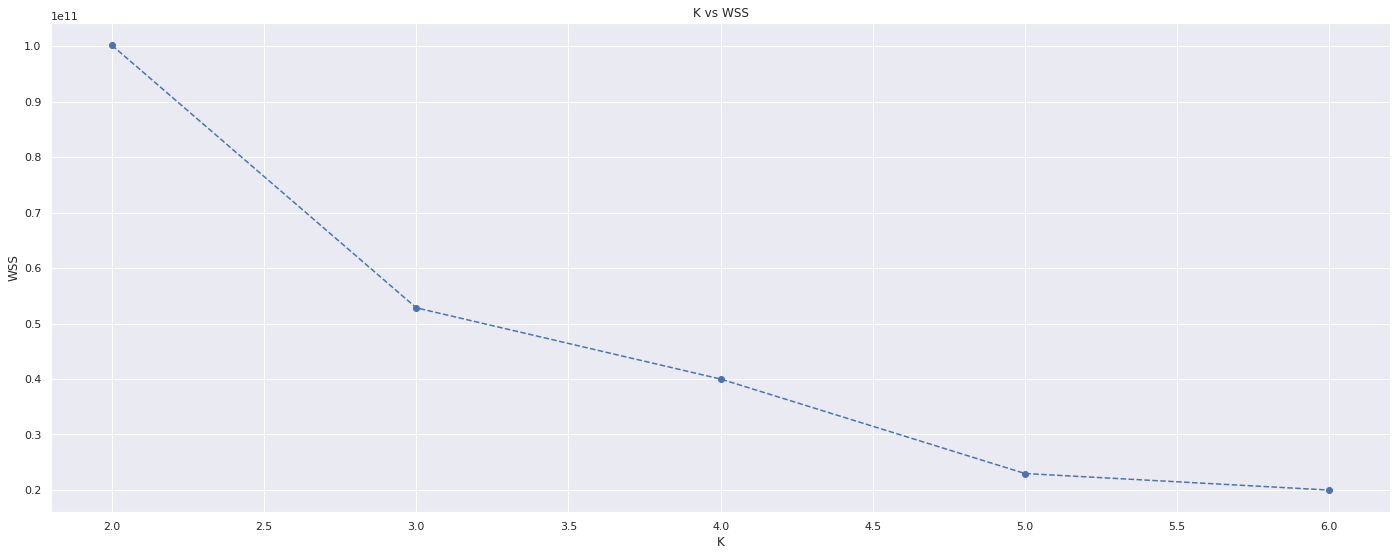

In [24]:
wss = []

for k in clusters:
    # Definição do modelo
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    
    # Treinamento do modelo
    kmeans.fit(X)
    
    # Validação
    wss.append(kmeans.inertia_)
    
# Plot do gráfico
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('WSS')
plt.title('K vs WSS');

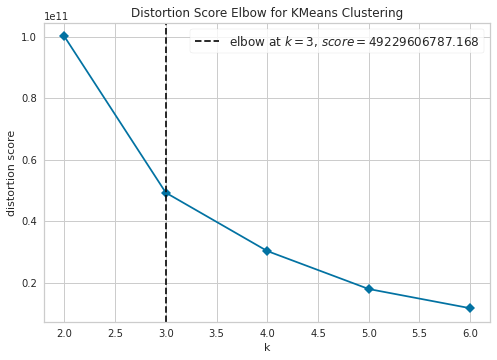

In [26]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## 7.2 - Sillhouette Score

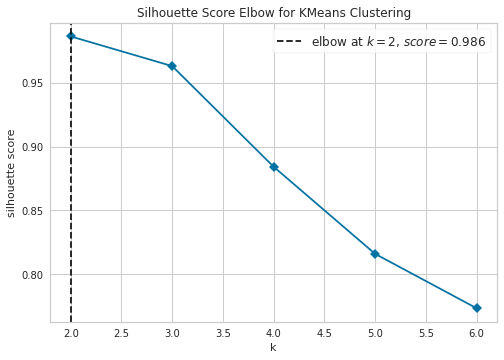

In [29]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(KMeans(), k=clusters, timings=False, metric='silhouette')
kmeans.fit(X)
kmeans.show();

# 8 - Model Training

In [30]:
# Definição do modelo
k = 3
kmeans = KMeans(init='random', n_clusters=k, n_init=10, random_state=42)

# Treinamento do modelo
kmeans.fit(X)

# clustering
labels = kmeans.labels_

In [41]:
print(f'Valor do WSS: {kmeans.inertia_}')
print('Valor do SS: {}'.format(silhouette_score(X, labels, metric='euclidean')))

Valor do WSS: 52830442008.00697
Valor do SS: 0.9494677566681542


# 9 - Análise do cluster

In [51]:
df9 = df5.copy()
df9['cluster'] = labels

## 9.1 - Vizualização de inspeção

In [52]:
df9.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'invoice_no',
       'cluster'],
      dtype='object')

In [53]:
px.scatter_3d(x='recency_days', y='invoice_no', z='gross_revenue', data_frame=df9, color='cluster')

## 9.2 - Perfil do cluster

In [54]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


In [58]:
# Número de customers
df_cluster = df9.groupby('cluster', as_index=False)['customer_id'].count()
df_cluster['percent_customer'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum()) *100

# Média do gross_revenue
df_gross_revenue = df9.groupby('cluster', as_index=False)['gross_revenue'].mean()
df_cluster = pd.merge(df_cluster, df_gross_revenue, on='cluster', how='inner')

# Média do recency_days
df_recency_days = df9.groupby('cluster', as_index=False)['recency_days'].mean()
df_cluster = pd.merge(df_cluster, df_recency_days, on='cluster', how='inner')

# Média do invoice_no
df_invoice_no = df9.groupby('cluster', as_index=False)['invoice_no'].mean()
df_cluster = pd.merge(df_cluster, df_invoice_no, on='cluster', how='inner')

df_cluster

,cluster,customer_id,percent_customer,gross_revenue,recency_days,invoice_no
0,0,4335,99.15,1372.58,92.26,4.61
1,1,6,0.14,182181.98,7.17,89.00
2,2,31,0.71,40543.52,13.29,53.29


### Cluster 1 (Candidatos Insiders)

- Número de customers: 6 (0.14% do customers )
- Recência em média: 7 dias
- Compras em média: 89 compras
- Receita em média: $182.182,00 dólares

### Cluster 2

- Número de customers: 31 (0.71 do customers )
- Recência em média: 14 dias
- Compras em média: 53 compras
- Receita em média: $40.543,52 dólares

### Cluster 3

- Número de customers: 4.335 (99% do customers )
- Recência em média: 92 dias
- Compras em média: 5 compras
- Receita em média: $1.372,57 dólares

# 10 - Tradução e interpretação do erro

## 10.1 - Business Perfomance

## 10.2 - Total Perfomance

## 10.3 - Machine Learning Perfomance